## High Income Prediction Project

Dataset Source : https://www.kaggle.com/code/wenruliu/income-prediction/data

## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


from matplotlib import pyplot
import seaborn as sns


from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/High Income Gru.csv")
data.shape  

(68378, 15)

In [3]:
data.head()

,row ID,Age,WorkClass,X1,Education Level,X2,Marital Status,Occupation,X3,Gender,X4,X5,Hours Per Week Working,Native Country,High Income
0,Row2,38.0,2,215646.0,1,9.0,2,2,0,0,0.0,0.0,40.0,0,0
1,Row3,53.0,2,234721.0,2,7.0,1,2,1,0,0.0,0.0,40.0,0,0
2,Row5,37.0,2,284582.0,3,14.0,1,1,0,1,0.0,0.0,40.0,0,0
3,Row7,52.0,1,209642.0,1,9.0,1,1,0,0,0.0,0.0,45.0,0,1
4,Row8,31.0,2,45781.0,3,14.0,0,3,0,1,14084.0,0.0,50.0,0,1


In [4]:
data.columns

Index(['row ID', 'Age', 'WorkClass', 'X1', 'Education Level', 'X2',
       'Marital Status', 'Occupation', 'X3', 'Gender', 'X4', 'X5',
       'Hours Per Week Working', 'Native Country', 'High Income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68378 entries, 0 to 68377
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   row ID                  68378 non-null  object 
 1   Age                     68378 non-null  float64
 2   WorkClass               68378 non-null  int64  
 3   X1                      68378 non-null  float64
 4   Education Level         68378 non-null  int64  
 5   X2                      68378 non-null  float64
 6   Marital Status          68378 non-null  int64  
 7   Occupation              68378 non-null  int64  
 8   X3                      68378 non-null  int64  
 9   Gender                  68378 non-null  int64  
 10  X4                      68378 non-null  float64
 11  X5                      68378 non-null  float64
 12  Hours Per Week Working  68378 non-null  float64
 13  Native Country          68378 non-null  int64  
 14  High Income             68378 non-null

In [6]:
data.isnull().sum()

row ID                    0
Age                       0
WorkClass                 0
X1                        0
Education Level           0
X2                        0
Marital Status            0
Occupation                0
X3                        0
Gender                    0
X4                        0
X5                        0
Hours Per Week Working    0
Native Country            0
High Income               0
dtype: int64

In [7]:
data.dtypes

row ID                     object
Age                       float64
WorkClass                   int64
X1                        float64
Education Level             int64
X2                        float64
Marital Status              int64
Occupation                  int64
X3                          int64
Gender                      int64
X4                        float64
X5                        float64
Hours Per Week Working    float64
Native Country              int64
High Income                 int64
dtype: object

In [8]:
data.drop('row ID',axis=1,inplace=True)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,68378.0,43.292721,16.913851,17.0,30.723923,40.114881,52.666426,90.0
WorkClass,68378.0,2.812966,1.903760,0.0,2.000000,2.000000,4.000000,8.0
X1,68378.0,351877.227838,359571.802517,12285.0,127151.000000,200925.000000,388094.889616,1484705.0
Education Level,68378.0,4.622203,4.249394,0.0,1.000000,4.000000,7.000000,15.0
X2,68378.0,9.748831,3.183975,1.0,9.000000,10.000000,12.190965,16.0
Marital Status,68378.0,1.653865,1.747270,0.0,0.000000,1.000000,2.000000,6.0
Occupation,68378.0,5.374989,3.843540,0.0,2.000000,5.000000,8.000000,14.0
X3,68378.0,0.756033,1.239573,0.0,0.000000,0.000000,1.000000,4.0
Gender,68378.0,0.380883,0.485607,0.0,0.000000,0.000000,1.000000,1.0
X4,68378.0,15904.929798,28084.641539,0.0,0.000000,0.000000,18681.276836,99999.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data)
data_scaled = scaling.transform(data)

In [11]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

In [12]:
data_scaled.head()

,Age,WorkClass,X1,Education Level,X2,Marital Status,Occupation,X3,Gender,X4,X5,Hours Per Week Working,Native Country,High Income
0,0.287671,0.250,0.138113,0.066667,0.533333,0.333333,0.142857,0.00,0.0,0.000000,0.0,0.397959,0.0,0.0
1,0.493151,0.250,0.151068,0.133333,0.400000,0.166667,0.142857,0.25,0.0,0.000000,0.0,0.397959,0.0,0.0
2,0.273973,0.250,0.184932,0.200000,0.866667,0.166667,0.071429,0.00,1.0,0.000000,0.0,0.397959,0.0,0.0
3,0.479452,0.125,0.134036,0.066667,0.533333,0.166667,0.071429,0.00,0.0,0.000000,0.0,0.448980,0.0,1.0
4,0.191781,0.250,0.022749,0.200000,0.866667,0.000000,0.214286,0.00,1.0,0.140841,0.0,0.500000,0.0,1.0


In [13]:
X = data_scaled.loc[:, data_scaled.columns != 'High Income']
y = data_scaled[['High Income']]

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=2)

## Machine Learning Algorithms

### XGBoost Classifier

[0.76297921 0.76130784 0.75900971 0.76590411 0.76567071]
Accuracy of XGBOOST KFold with k=10: 76.30%
[[27364  5211]
 [ 6134  9155]]


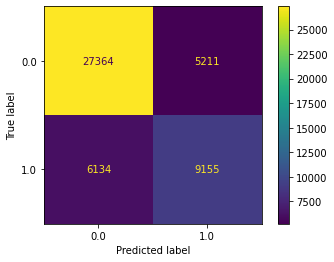

In [15]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=500, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 2)
results_kfold = cross_val_score(xgb, Xtrain, Ytrain.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, Xtrain, Ytrain.values.ravel(), cv=5)
conf_mat = confusion_matrix(Ytrain, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(Ytrain,pred)

In [16]:
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
xgb.fit(Xtrain,Ytrain.values.ravel())
y_pred = xgb.predict(Xtest)

AUC Score: 0.7328995368296408
Accuracy  XGBOOST: 77.18631178707224 %
Confusion Matrix:
[[11731  2213]
 [ 2467  4103]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83     13944
         1.0       0.65      0.62      0.64      6570

    accuracy                           0.77     20514
   macro avg       0.74      0.73      0.74     20514
weighted avg       0.77      0.77      0.77     20514



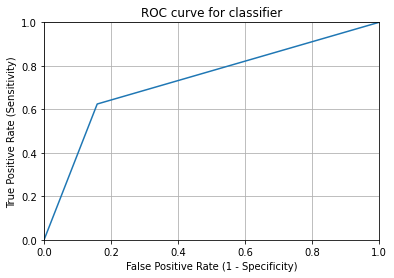

In [17]:
AUC_Score = roc_auc_score(Ytest,y_pred)
print("AUC Score:",AUC_Score)


accuracy = xgb.score(Xtest, Ytest)
print("Accuracy  XGBOOST:",accuracy*100,"%")

from sklearn.metrics import confusion_matrix
ac = confusion_matrix(Ytest,y_pred)
print("Confusion Matrix:")
print(ac)

from sklearn.metrics import classification_report
print(classification_report(Ytest,y_pred))

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(Ytest, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



### Support Vector Machine

[0.70719733 0.69539329 0.70312337 0.70395905 0.70257   ]
Accuracy (Support Vector Machine) KFold with k=5: 70.24%
[[28166  4409]
 [ 9833  5456]]


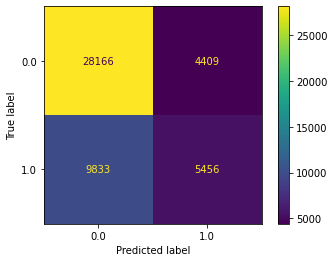

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, random_state=20, shuffle=True)
svm = SVC(gamma='auto')

results_kfold = cross_val_score(svm, Xtrain, Ytrain.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Support Vector Machine) KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(svm, Xtrain, Ytrain.values.ravel(), cv=5)
conf_mat = confusion_matrix(Ytrain, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(Ytrain,pred)

In [20]:
svm = SVC(gamma='scale')
svm.fit(Xtrain,Ytrain.values.ravel())
y_pred = svm.predict(Xtest)

AUC Score: 0.6654486504399857
Accuracy  SVM: 73.34015794091839 %
Confusion Matrix:
[[11915  2029]
 [ 3440  3130]]
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81     13944
         1.0       0.61      0.48      0.53      6570

    accuracy                           0.73     20514
   macro avg       0.69      0.67      0.67     20514
weighted avg       0.72      0.73      0.72     20514



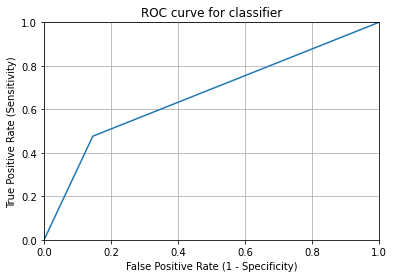

In [21]:
AUC_Score = roc_auc_score(Ytest,y_pred)
print("AUC Score:",AUC_Score)


accuracy = svm.score(Xtest, Ytest)
print("Accuracy  SVM:",accuracy*100,"%")

from sklearn.metrics import confusion_matrix
ac = confusion_matrix(Ytest,y_pred)
print("Confusion Matrix:")
print(ac)

from sklearn.metrics import classification_report
print(classification_report(Ytest,y_pred))

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(Ytest, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

